In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [82]:
import pandas as pd

In [83]:
X = pd.read_parquet('X.parquet')
Y = pd.read_parquet('Y.parquet')

In [84]:
# # Gerar dados de entrada (5 variáveis)
# num_samples = 100
# X = np.random.rand(num_samples, 5)  # Dados de entrada aleatórios no intervalo [0, 1]

# # Gerar dados de saída (2 variáveis)
# Y = np.column_stack((np.sum(X[:, :3], axis=1), np.mean(X[:, 3:], axis=1)))


X = X.values

Y = Y.values


# Dividir dados entre treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [85]:
X.shape[1]

166

Epoch 1/500


c:\Users\rafae\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 1s - 602ms/step - loss: 206.4338 - val_loss: 185.9845
Epoch 2/500
1/1 - 0s - 62ms/step - loss: 202.1124 - val_loss: 182.3137
Epoch 3/500
1/1 - 0s - 62ms/step - loss: 197.9391 - val_loss: 178.5256
Epoch 4/500
1/1 - 0s - 65ms/step - loss: 194.0756 - val_loss: 174.9261
Epoch 5/500
1/1 - 0s - 65ms/step - loss: 190.3539 - val_loss: 171.3445
Epoch 6/500
1/1 - 0s - 61ms/step - loss: 186.8008 - val_loss: 167.8743
Epoch 7/500
1/1 - 0s - 60ms/step - loss: 183.4469 - val_loss: 164.5731
Epoch 8/500
1/1 - 0s - 64ms/step - loss: 180.0622 - val_loss: 161.3362
Epoch 9/500
1/1 - 0s - 84ms/step - loss: 176.7534 - val_loss: 158.1279
Epoch 10/500
1/1 - 0s - 91ms/step - loss: 173.4814 - val_loss: 154.9449
Epoch 11/500
1/1 - 0s - 83ms/step - loss: 170.2627 - val_loss: 151.8846
Epoch 12/500
1/1 - 0s - 83ms/step - loss: 167.0182 - val_loss: 148.8653
Epoch 13/500
1/1 - 0s - 88ms/step - loss: 163.7660 - val_loss: 145.9199
Epoch 14/500
1/1 - 0s - 77ms/step - loss: 160.5753 - val_loss: 142.9921
Epoch 15/500

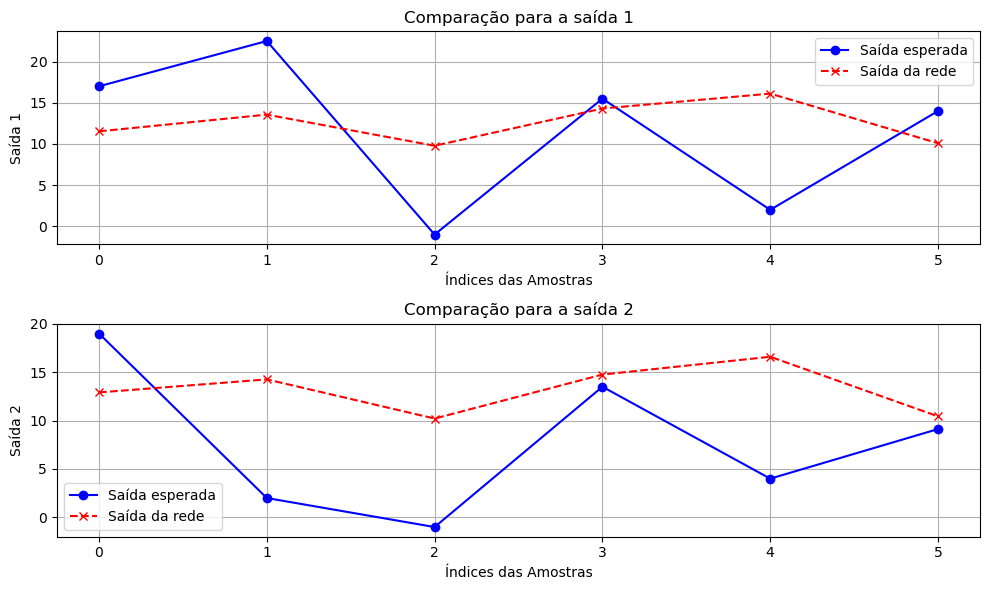

In [86]:
# Criar e configurar o modelo
model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation='relu'))  # Camada oculta com 10 neurônios
model.add(Dense(Y.shape[1], activation='linear'))  # Camada de saída com 2 neurônios

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Configurar Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitora a perda no conjunto de validação
    patience=10,         # Número de épocas sem melhora antes de parar
    restore_best_weights=True  # Restaura os pesos da melhor época
)

# Treinar o modelo com Early Stopping
history = model.fit(
    X_train, Y_train,
    epochs=500, 
    verbose=2, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Testar o modelo
Y_pred = model.predict(X_test)

# Avaliar desempenho
mse_error = mean_squared_error(Y_test, Y_pred)
print(f"Erro médio quadrático (MSE) no conjunto de teste: {mse_error:.4f}")

# Plotar resultados
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.plot(Y_test[:, i], 'b-o', label='Saída esperada')
    plt.plot(Y_pred[:, i], 'r--x', label='Saída da rede')
    plt.xlabel('Índices das Amostras')
    plt.ylabel(f'Saída {i+1}')
    plt.legend()
    plt.grid(True)
    plt.title(f'Comparação para a saída {i+1}')
plt.tight_layout()
plt.show()
